In [1]:
import numpy as np
from EM import EM
from plot import plot
import matplotlib.pyplot as plt

In [2]:
# EM Setting
num_past_effects = 3
training_pct = .8
single_effect = False

In [3]:
data = np.load('../Data/inr_preprocessed_data.npz')

In [4]:
%%time
em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], num_past_effects, K=0, train_pct=training_pct, X_prev_given=True,
        X_prev = data['X_prev_mtx'], single_effect=single_effect)
em.run_EM(50)

/home/bear/Documents/Counterfactual-Prediction/EM.py:469: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(self.sigma_pred[n, index]+self.sigma_2))


max iterations: 50 reached
CPU times: user 3min 21s, sys: 29 ms, total: 3min 21s
Wall time: 3min 21s


In [5]:
em.get_MSE()

0.7540341786070488

In [6]:
treatment_types = ['nsaid', 'transfusion_plasma', 'transfusion_platelet', 'anticoagulant', 'aspirin']
for i, treatment in enumerate(treatment_types):
    print('Coefficient for {}: {}'.format(treatment, em.A[:, i]))
static_types = ['chronic kidney failure', 'sickle cell', 'age']
for j, static in enumerate(static_types):
    print('Coefficient for {}: {}'.format(static, em.b[j]))

Coefficient for nsaid: [-0.04591345  0.00616547 -0.04615003]
Coefficient for transfusion_plasma: [-0.59419729  0.00337044 -0.02034137]
Coefficient for transfusion_platelet: [-0.38383555 -0.14650816 -0.2715472 ]
Coefficient for anticoagulant: [-0.65531307 -0.72449646 -0.50174012]
Coefficient for aspirin: [-0.08470063 -0.10461858 -0.02295429]
Coefficient for chronic kidney failure: -0.3225907140756116
Coefficient for sickle cell: -0.6797774446496704
Coefficient for age: -0.02518164892325425


In [7]:
random_patients = np.random.randint(0, em.y.shape[0], 0)
for i in random_patients:
    plot(em, i, time_unit=18)

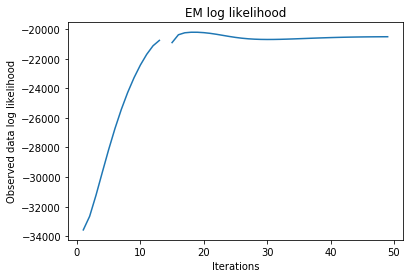

In [8]:
plt.plot([i for i in range(1, len(em.obs_log_lik))], em.obs_log_lik[1:])
plt.xlabel('Iterations')
plt.ylabel('Observed data log likelihood')
plt.title('EM log likelihood')
plt.show()

In [9]:
em.obs_log_lik

[-44170.06600005979,
 -33569.78749039252,
 -32650.949290578348,
 -31233.10047299146,
 -29675.90338804582,
 -28142.397581379446,
 -26713.317885421995,
 -25424.043485560727,
 -24284.039764166675,
 -23289.446002009612,
 -22432.040775205216,
 -21707.328404183758,
 -21127.871345697316,
 -20764.022036473252,
 nan,
 -20912.72887338744,
 -20383.440941525845,
 -20250.340028985524,
 -20213.329425732627,
 -20214.20534503777,
 -20240.207223294612,
 -20287.52934208312,
 -20351.31414552053,
 -20423.925606803045,
 -20496.654617504308,
 -20562.11543487604,
 -20615.67281641974,
 -20655.546882914816,
 -20682.09884490717,
 -20696.92503500671,
 -20702.124871537144,
 -20699.838918225698,
 -20692.01275043914,
 -20680.30699517778,
 -20666.086600688253,
 -20650.445899380305,
 -20634.245478418146,
 -20618.149404305583,
 -20602.658323747615,
 -20588.137398852738,
 -20574.83948933551,
 -20562.92444820765,
 -20552.475401868563,
 -20543.512725925248,
 -20536.00623942786,
 -20529.885977022634,
 -20525.051774973785,